# Linear production varying productive capacity, tech constant and diminishing utility constant


## Experiment info

git commit: [2ed020ac51d24a5394c5c07caba32910c3a61374](https://github.com/jzkelter/tabular-standards/commit/2ed020ac51d24a5394c5c07caba32910c3a61374)


Experiment 1
```
["setup-structure" "Single-PG&CG-TC=1.json" "Single-PG&CG-TC=2.json" "Single-PG&CG-TC=3.json"]
["max-prod-capacity-per-capita" 0.1 0.5 1 1.5 2 2.5 3 3.25 3.5 4 4.5 5 6 6.5 7 8 10 12 15 20]
["DIMINISHING-UTILITY-CONSTANT" 0.25 0.5]
["alpha" 1]
["layoff-probability" 0.5]
["n-firms" 30]
["index-in-use" "no index"]
["firm-competency" 0]
["transactions-per-month" 1]
["n-households" 500]
["mean-new-agreements-per-month" 2]
["fix-n-framework-agreements?" false]
["firm-memory-constant" 0.8]
["framework-duration" 24]
["minimum-wage" 0.8]

```
Time limit: 3000 for max-prod-capacity-per-capita>1 and 6000 for <1

reporters:
```
unemployment-rate
mean-consumer-demand-not-satisfied
mean-firm-demand-not-satisfied
total-sales
cg-production
consumer-demand
mean-wage-rate
mean-cg-price
mean-pg-price
mean-current-profit-all-firms
mean-lifetime-profit-all-firms
turnover-rate
bankrupt-firms
mean-age
mean-inventories
gini-coefficient
```

## data processing and helper functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
filename = "single-firm-vary-primary-prod-capacity & min-wage.csv"
df = pd.read_csv(filename, skiprows=6)

def map_setup_structure_to_color(ss):
    if "=1" in ss:
        return 1
    elif "=2" in ss:
        return 2
    elif "=3" in ss:
        return 3
    
df["color"] = df['setup-structure'].apply(map_setup_structure_to_color)
#  "Single-PG&CG-TC=2.json" "Single-PG&CG-TC=3.json"
# ## tech parameter of
# df1 = df[df["setup-structure"] == "Single-PG&CG-TC=1.json"]

# # ## Two layer setup PG -> CG setup
# # df2 = df[df["setup-structure"] == "Two-Layer-PG-CG.json"]




In [2]:
df.columns

Index(['[run number]', 'setup-structure', 'max-prod-capacity-per-capita',
       'DIMINISHING-UTILITY-CONSTANT', 'alpha', 'layoff-probability',
       'n-firms', 'index-in-use', 'firm-competency', 'transactions-per-month',
       'n-households', 'mean-new-agreements-per-month',
       'fix-n-framework-agreements?', 'firm-memory-constant',
       'framework-duration', 'minimum-wage', '[step]', 'unemployment-rate',
       'mean-consumer-demand-not-satisfied', 'mean-firm-demand-not-satisfied',
       'total-sales', 'cg-production', 'consumer-demand', 'mean-cg-price',
       'mean-pg-price', 'sd-cg-price', 'sd-pg-price',
       'mean-current-profit-all-firms', 'mean-lifetime-profit-all-firms',
       'turnover-rate', 'bankrupt-firms', 'mean-age', 'mean-inventories',
       'gini-coefficient', 'color'],
      dtype='object')

In [2]:
PLOT_VARS = ['unemployment-rate', 'total-sales', 'cg-production', 'consumer-demand', 
             'mean-wage-rate', 'mean-cg-price', 'mean-pg-price',
             'turnover-rate', 'mean-consumer-demand-not-satisfied', 'mean-firm-demand-not-satisfied',
             'bankrupt-firms', 'mean-current-profit-all-firms', 'mean-lifetime-profit-all-firms',       
             'mean-age', 'mean-inventories', 'gini-coefficient']

def plot_mean_vs_prod_capacity(ladf, var):    
    plt.figure()
    dim_util_consts = ladf['DIMINISHING-UTILITY-CONSTANT'].unique()
    for duc in dim_util_consts:
        tladf = ladf[ladf['DIMINISHING-UTILITY-CONSTANT']==duc]
        plt.plot(tladf['max-prod-capacity-per-capita'], tladf[var])

    plt.legend(dim_util_consts)
    plt.xlabel("max productive capacity per capita")
    plt.ylabel(var)
    plt.title(var + " vs Max Productive Capacity")   
    plt.show()

def plot_vars_vs_prod_capacity(ladf):        
    for v in PLOT_VARS:
        plot_mean_vs_prod_capacity(ladf, v)
        
def plot_timeseries(ldf, var):
    plt.figure()
    plt.plot(ldf['[step]'], ldf[var])
    plt.xlabel("ticks")
    plt.ylabel(var)
    plt.title(var + " timeseries")    
    plt.show()

def plot_var_timeseries(ldf):
    for v in PLOT_VARS:
        plot_timeseries(ldf, v)

## Single-PG&CG-Firm 

### plot mean variables

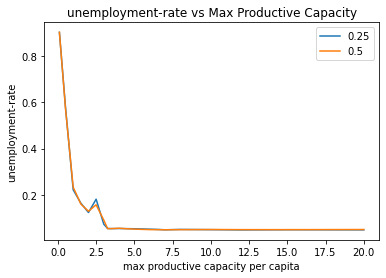

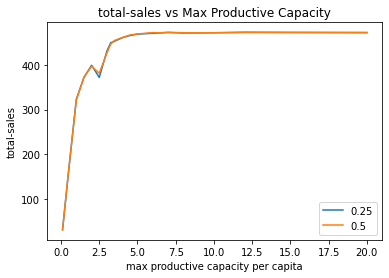

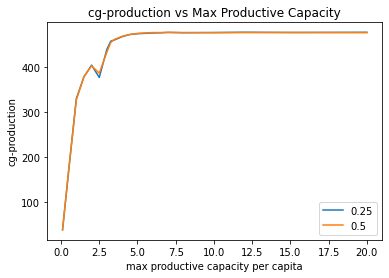

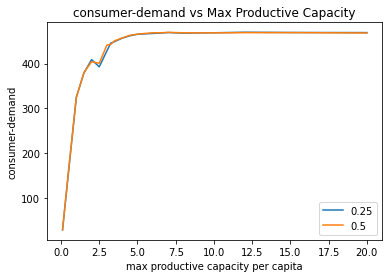

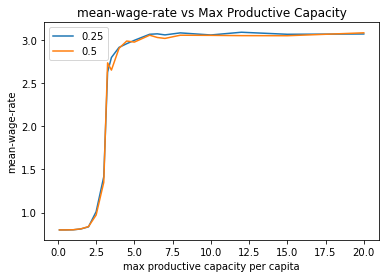

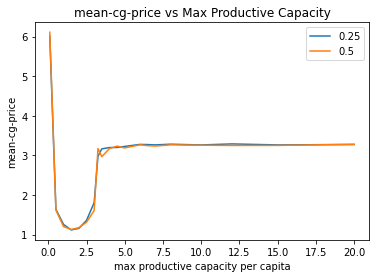

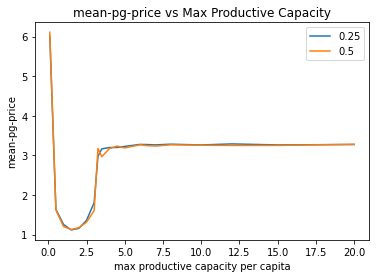

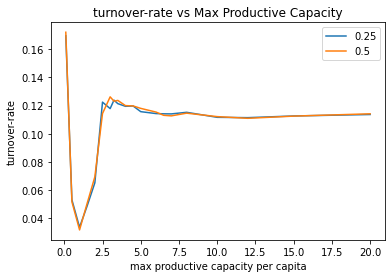

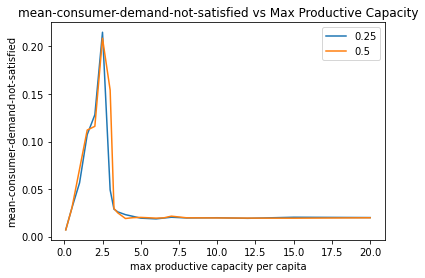

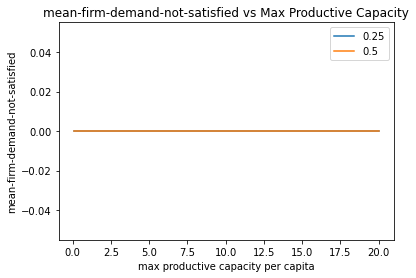

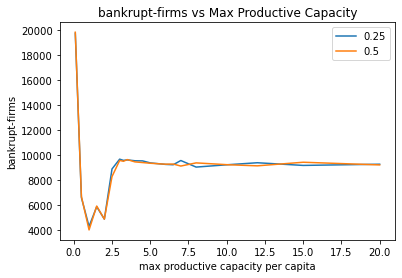

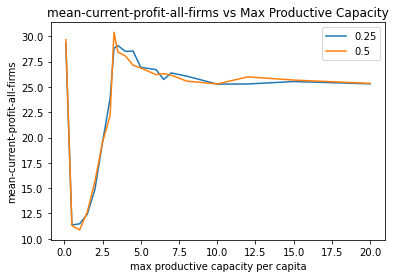

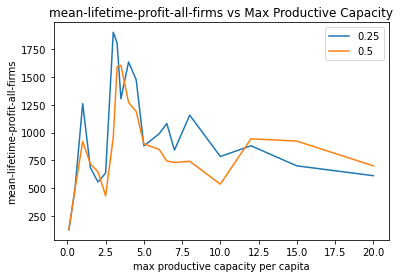

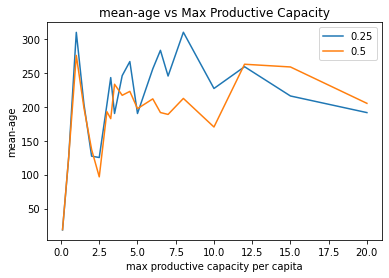

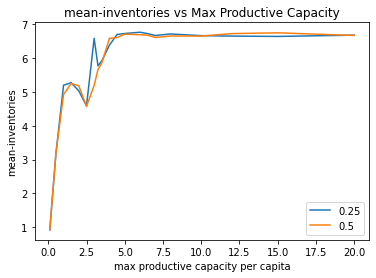

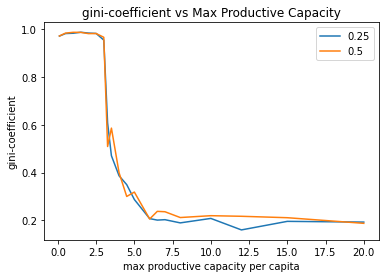

In [4]:
#  "Single-PG&CG-TC=1.json" 
# "Single-PG&CG-TC=2.json"
# adf = df[(df['[step]'] >= 2000) & (df['setup-structure']=="Single-PG&CG-TC=2.json")].groupby('max-prod-capacity-per-capita').mean()
adf = df[(df['[step]'] >= 2000)].groupby(['max-prod-capacity-per-capita', 'setup-structure', 'DIMINISHING-UTILITY-CONSTANT']).mean().reset_index()
plot_vars_vs_prod_capacity(adf[adf['setup-structure']=="Single-PG&CG-TC=1.json" ])


In [25]:
# adf2 = df.groupby('max-prod-capacity-per-capita').std()
# plot_vars_vs_prod_capacity(adf2)

### Plot individual trajectory

In [18]:
df["max-prod-capacity-per-capita"].unique()

array([ 0.1 ,  0.5 ,  1.  ,  1.5 ,  2.  ,  2.5 ,  3.  ,  3.25,  3.5 ,
        4.  ,  4.5 ,  5.  ,  6.  ,  6.5 ,  7.  ,  8.  , 10.  , 12.  ,
       15.  , 20.  ])

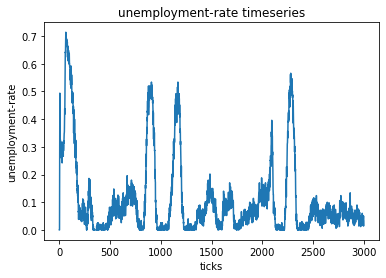

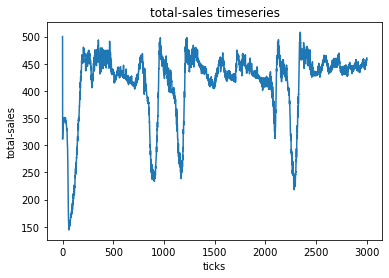

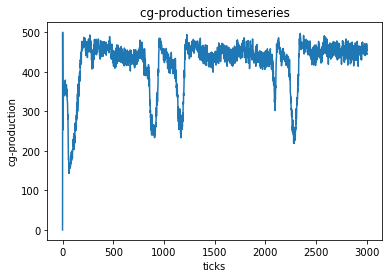

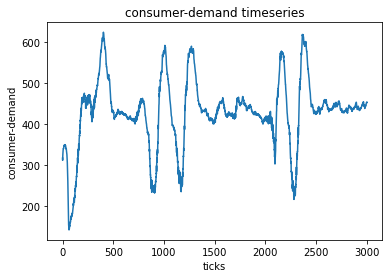

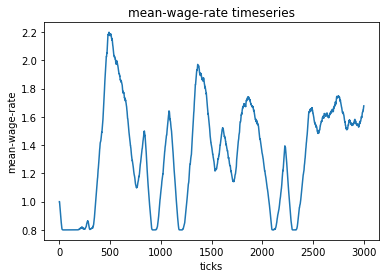

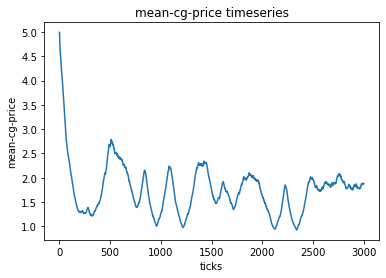

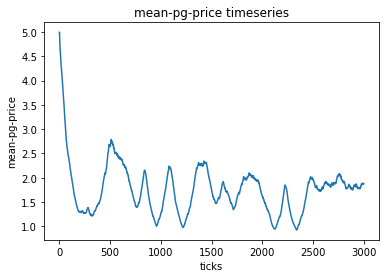

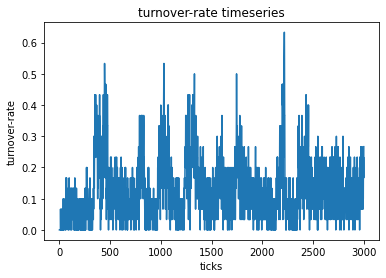

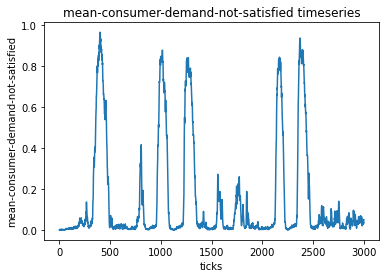

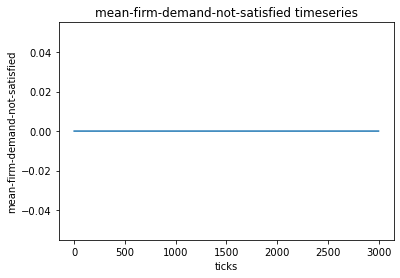

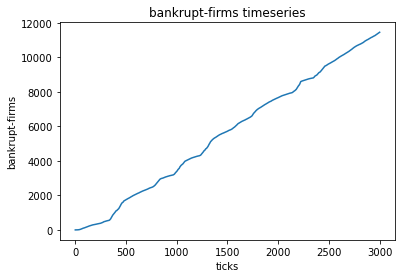

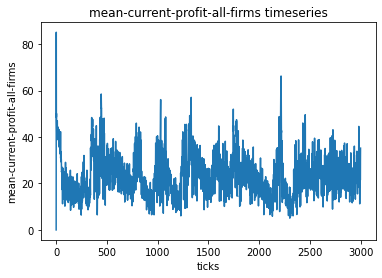

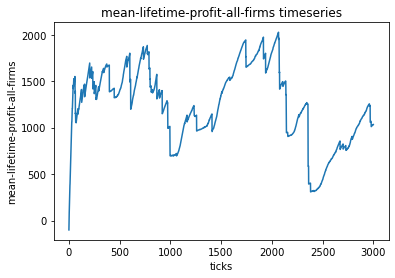

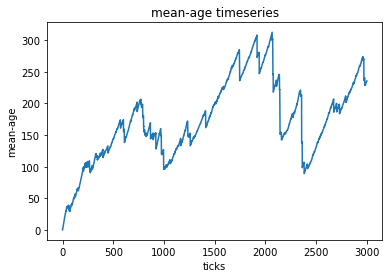

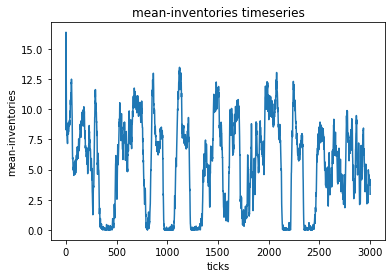

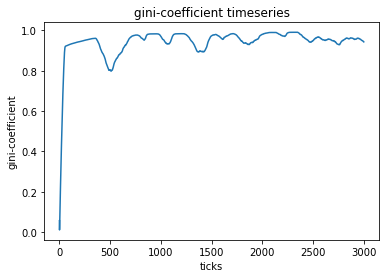

In [22]:
tdf = df[(df["max-prod-capacity-per-capita"] == 3) & (df["setup-structure"] == "Single-PG&CG-TC=1.json") & ((df["DIMINISHING-UTILITY-CONSTANT"] == 0.5))]
plot_var_timeseries(tdf)